# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [2]:
install.packages("Rtsne")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [4]:
wine <- read_csv("wine.csv")
colnames(wine)
summary(wine)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Alcohol"                      "Malicacid"                   
 [3] "Ash"                          "Alcalinity_of_ash"           
 [5] "Magnesium"                    "Total_phenols"               
 [7] "Flavanoids"                   "Nonflavanoid_phenols"        
 [9] "Proanthocyanins"              "Color_intensity"             
[11] "Hue"                          "0D280_0D315_of_diluted_wines"
[13] "Proline"                      "class"

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [8]:
wine_scaled <- wine %>%
  mutate(across(-class, ~as.numeric(scale(.x))))

summary(wine_scaled)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

Based on the summary statistics from the imported data, scaling is important before conducting PCA because some variables (like malicacid and total_phenols) are small in scale, while other variables like Proline are much much larger. Performing a PCA on these variables without scaling would make variables like Proline dominate the principal components but only because they are larger in scale and not importance. Scaling puts all variables on the same footing so the PCA reflects different patterns rather than measurments.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [11]:
# A) Perform PCA
wine_pca <- prcomp(wine_scaled %>% select(-class), center = FALSE, scale. = FALSE)
summary(wine_pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

B) ~36% of the total variance is explained by PC1, and ~19% is explained by PC2. We use summary() function to see this information.

C) We do PCA first because it reduces 13 features into 2 or 3 components. Making it easier to see patterns or clusters in the wine data. It also prevents high-variance features (like Proline) from dominating.

In [12]:
# D) The rotation matrix is loadings of each original feature on the PCs.
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


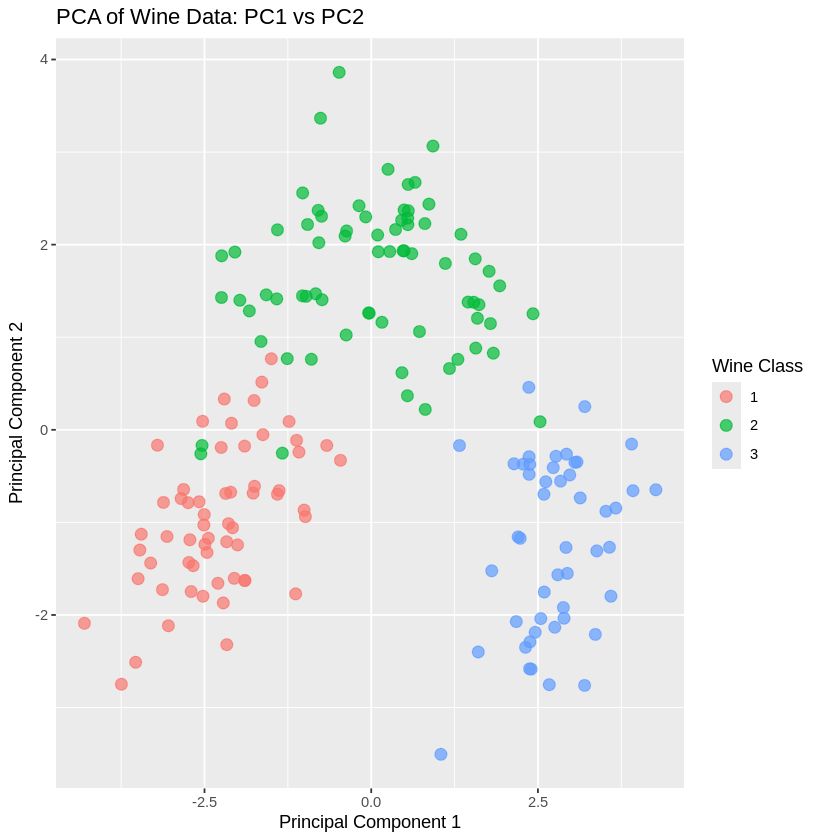

In [13]:
# E)
# Only PC1 and PC2
pc_df <- as.data.frame(wine_pca$x[, 1:2]) %>%
  rename(PC1 = PC1, PC2 = PC2)

# Add back the class variable
pc_df <- pc_df %>%
  mutate(class = wine_scaled$class)

# Plot PC1 vs PC2
ggplot(pc_df, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "PCA of Wine Data: PC1 vs PC2",
       x = "Principal Component 1",
       y = "Principal Component 2",
       color = "Wine Class")


F) There is clear seperation of wine classes into clusters (with few overlapping slightly). The three calsses are seperated along PC1 and PC2. This means that wines from the same class group together, so the chemical properties are good at distinguishing wine classes.

G) PCA would fail on data that has a non-linear structure. For example, data in a spiral shape.

H) A vector space is a flat, Euclidean space where PCA works (has linear relationships, orthogonal directions). A manifold is a curved, nonlinear space that is embedded in higher dimensions. Data can "live" on lower-dimensional surface that isn't flat. PCA captures linear variance, while T-SNE captures nonlinear structures, so it can reveal cluters when PCA fails.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [15]:
set.seed(123)

# Take first 10 PCs
pca10 <- as.data.frame(wine_pca$x[, 1:10]) %>%
  mutate(class = wine_scaled$class) %>%
  distinct()   # remove duplicates

# Run T-SNE
wine_tsne <- Rtsne(pca10 %>% select(-class), dims = 2, perplexity = 30, verbose = TRUE)


Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.396099 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.127538 (50 iterations in 0.02 seconds)
Iteration 150: error is 50.598560 (50 iterations in 0.02 seconds)
Iteration 200: error is 50.140847 (50 iterations in 0.02 seconds)
Iteration 250: error is 50.024571 (50 iterations in 0.02 seconds)
Iteration 300: error is 0.632583 (50 iterations in 0.02 seconds)
Iteration 350: error is 0.376300 (50 iterations in 0.02 seconds)
Iteration 400: error is 0.367101 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.366323 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.364658 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.369730 (50 iterations in 0.01 seconds)
Iteration 600

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


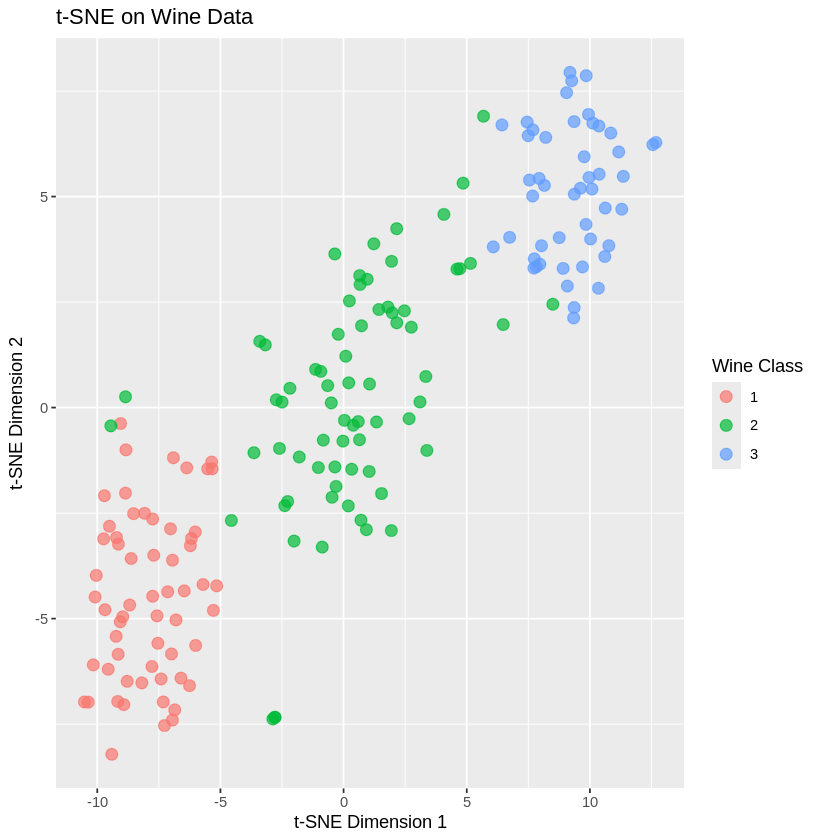

In [16]:
# Convert to tibble
tsne_df <- as_tibble(wine_tsne$Y) %>%
  rename(Dim1 = V1, Dim2 = V2) %>%
  mutate(class = pca10$class)

# Plot
ggplot(tsne_df, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "t-SNE on Wine Data",
       x = "t-SNE Dimension 1",
       y = "t-SNE Dimension 2",
       color = "Wine Class")


C) We didn't stop at PCA because PCA only captures linear variance. Some data structures are nonlinear manifolds so PCA will miss those patterns. T-SNE also preserves local neighborhood relationships so it makes clusters of similar points clearer. So we already showed seperation with PCA, but T-SNE makes the class clusters even more distinct.

D) This workflow would make sense for high-dimensional data (like more than 50 features) or data that may lie on a nonlinear manifold. For example, images (pixels are high-dimensional).